# Pandas

Kind of excel for python :)

- Cleaning 
- filtering 
- transforming 
- writing a new file 

Keep the output that you want to achieve in mind / plot that you want 

**When in doubt, documentation: www.pandas.pydata.org/pandas-docs**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline  

**Import data from csv file**

In [3]:
df = pd.read_csv('per-capita-electricity-consumption-subset.csv', sep=',', index_col=None, header=0)
df.head()

,Entity,Code,Year,Electricity consumption
0,Albania,ALB,1971,532.028432
1,Albania,ALB,1972,568.403202
2,Albania,ALB,1973,593.446746
3,Albania,ALB,1974,591.032643
4,Albania,ALB,1975,739.345093


**Import data from excel file**

In [4]:
df = pd.read_excel('per-capita-electricity-consumption-subset.xlsx', 
                   sheet_name='per-capita-electricity-consumption-subset')


### Manipulate the dataframe

#### Delete a column

In [5]:
del df['Code']
df.head()

,Entity,Year,Electricity consumption
0,Albania,1971,532.028432
1,Albania,1972,568.403202
2,Albania,1973,593.446746
3,Albania,1974,591.032643
4,Albania,1975,739.345093


#### Change column names 

In [6]:
df = df.rename({'Electric power consumption (kWh per capita) (kWh per capita)': 'Electricity consumption'}, axis='columns')
df.head()

,Entity,Year,Electricity consumption
0,Albania,1971,532.028432
1,Albania,1972,568.403202
2,Albania,1973,593.446746
3,Albania,1974,591.032643
4,Albania,1975,739.345093


### Exploring the dataframe

In [7]:
df.shape

(446, 3)

**Get unique values in the column 'Entity'**

In [8]:
df['Entity'].unique()

array(['Albania', 'Belarus', 'France', 'India', 'Iran', 'Lithuania',
       'Spain', 'United Kingdom', 'United States', 'Vietnam'],
      dtype=object)

**Select data for a given country** 

In [9]:
df['Entity'] == 'Albania' # evaluates to Boolean 

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
       ...  
416    False
417    False
418    False
419    False
420    False
421    False
422    False
423    False
424    False
425    False
426    False
427    False
428    False
429    False
430    False
431    False
432    False
433    False
434    False
435    False
436    False
437    False
438    False
439    False
440    False
441    False
442    False
443    False
444    False
445    False
Name: Entity, Length: 446, dtype: bool

In [10]:
df_albania = df[df['Entity'] == 'Albania'] # double square bracket attention!! / 
df_albania.head() # Evaluates to specific sub df for Albania

,Entity,Year,Electricity consumption
0,Albania,1971,532.028432
1,Albania,1972,568.403202
2,Albania,1973,593.446746
3,Albania,1974,591.032643
4,Albania,1975,739.345093


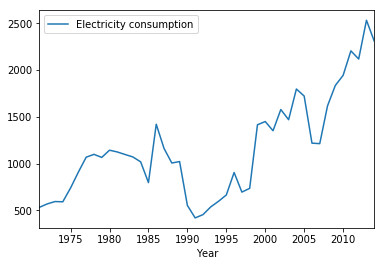

In [11]:
df_albania.plot(x='Year', y = 'Electricity consumption') 

### Explore data, group data and summarize it

#### Describe dataframe 

In [12]:
df.describe() # not so useful for this format

,Year,Electricity consumption
count,446.000000,446.000000
mean,1990.852018,3593.375077
std,14.716515,3410.746889
min,1960.000000,33.884598
25%,1979.000000,751.851208
50%,1992.000000,2801.226506
75%,2003.000000,5409.575624
max,2014.000000,13704.577048


**Get mean electricity consumption over time per country**

In [13]:
df.groupby('Entity').min()

,Year,Electricity consumption
Entity,,
Albania,1971,418.453589
Belarus,1990,2789.974495
France,1960,1456.693612
India,1971,98.056459
Iran,1971,274.134303
Lithuania,1990,2494.424475
Spain,1960,494.795600
United Kingdom,1960,2412.137405
United States,1960,4049.786629


For each country, get the minimum electricity consumption and the respective year

In [22]:
df.loc[df.groupby('Entity')['Electricity consumption'].idxmin()]

,Entity,Year,Electricity consumption
20,Albania,1991,418.453589
49,Belarus,1995,2789.974495
69,France,1960,1456.693612
124,India,1971,98.056459
168,Iran,1971,274.134303
215,Lithuania,1993,2494.424475
237,Spain,1960,494.795600
292,United Kingdom,1960,2412.137405
347,United States,1960,4049.786629
405,Vietnam,1974,33.884598


The inner part gives you the index where you find the minimum electricity consumption for each country.

The magic happens with the idxmin() function, which gives you the indices where you find the minimum electricity consumption.

In [23]:
df.groupby('Entity')['Electricity consumption'].idxmin()

Entity
Albania            20
Belarus            49
France             69
India             124
Iran              168
Lithuania         215
Spain             237
United Kingdom    292
United States     347
Vietnam           405
Name: Electricity consumption, dtype: int64

Then using the loc you can get the data for the row indices returned above.

In [25]:
df.loc[df.groupby('Entity')['Electricity consumption'].idxmin()]

,Entity,Year,Electricity consumption
20,Albania,1991,418.453589
49,Belarus,1995,2789.974495
69,France,1960,1456.693612
124,India,1971,98.056459
168,Iran,1971,274.134303
215,Lithuania,1993,2494.424475
237,Spain,1960,494.795600
292,United Kingdom,1960,2412.137405
347,United States,1960,4049.786629
405,Vietnam,1974,33.884598


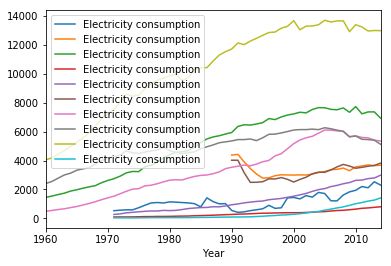

In [26]:
fig, ax = plt.subplots()
df.groupby(['Entity']).plot(x='Year', y='Electricity consumption', ax=ax);

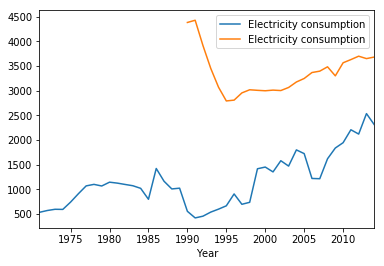

In [27]:
fig, ax = plt.subplots()
df[df['Entity'].isin(['Albania', 'Belarus'])].groupby(['Entity']).plot(x='Year', y='Electricity consumption', ax=ax);

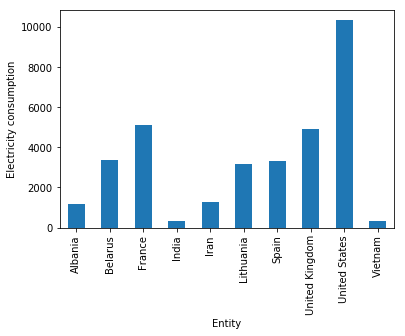

In [28]:
fig, ax = plt.subplots()
df.groupby('Entity')['Electricity consumption'].mean().plot.bar(ax=ax)

ax.set_xlabel('Entity')
ax.set_ylabel('Electricity consumption');

### Transforming the dataframe and saving it

In [30]:
df_small = df[df['Entity'].isin(['Belarus', 'India', 'Spain'])]
df_small['Entity'].unique()

# this is how you save your data in a csv file
df_small.to_csv('per-capita-electricity-consumption-3countries.csv', index=None, header=True)

### Exercise

#### 1. Plot the electricity consumption over the years for India. It should look like the plot below.

#### 2. Plot the maximum electricity consumption over the years for the following countries: United States, France, Lithuania, and India. It should look like the plot below.

Hint: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html